## QUESTION 2

### Data Cleaning

Importing initial libraries for data cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning) # to ignore datatype warning

In [3]:
df = pd.read_csv('MY2010-2014 Fuel Consumption Ratings 5-cycle.csv', encoding='cp863')
df.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION*,Unnamed: 9,...,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220
0,YEAR,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,ACURA,CSX,COMPACT,2.0,4.0,AS5,X,10.9,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,ACURA,CSX,COMPACT,2.0,4.0,M5,X,10.0,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,ACURA,CSX,COMPACT,2.0,4.0,M6,Z,11.6,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,ACURA,MDX AWD,SUV,3.7,6.0,AS6,Z,14.8,11.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dropna(axis=1, how='all', inplace=True) # dropping columns that contain only NaN values

In [5]:
# an iteration to collect rows with more than 10 NaN values
lis = []
for i in range(len(df)):
    if df.iloc[i].isnull().sum(axis=0) >= 10:
        lis.append(i)

In [6]:
# dropping rows from previous cell
df.drop(df.index[lis], inplace=True)
df=df.reset_index(drop=True) 

In [7]:
df

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS
0,YEAR,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km)
1,2010,ACURA,CSX,COMPACT,2.0,4.0,AS5,X,10.9,7.8,9.5,30,219
2,2010,ACURA,CSX,COMPACT,2.0,4.0,M5,X,10.0,7.6,8.9,32,205
3,2010,ACURA,CSX,COMPACT,2.0,4.0,M6,Z,11.6,8.1,10.0,28,230
4,2010,ACURA,MDX AWD,SUV,3.7,6.0,AS6,Z,14.8,11.3,13.2,21,304
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5355,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6.0,AS6,X,13.4,9.8,11.8,24.0,271.0
5356,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6.0,AS6,X,13.2,9.5,11.5,25.0,264.0
5357,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6.0,AS6,X,13.4,9.8,11.8,24.0,271.0
5358,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6.0,AS6,X,12.9,9.3,11.3,25.0,260.0


In [8]:
# renaming column headers to be more human readable
df.rename(columns = {'MODEL': 'MODEL_YEAR', 'MODEL.1': 'MODEL', 
                     'FUEL': 'FUEL_TYPE', 'FUEL CONSUMPTION*': 'CONSUMPTION_CITY',
                     'Unnamed: 9' : 'CONSUMPTION_HWY', 'Unnamed: 10': 'CONSUMPTION_COMB_L',
                     'Unnamed: 11' : 'CONSUMPTION_COMB_MPG' }, 
          inplace = True)

In [9]:
# removing irrelavnt first row
df.drop(0, inplace=True)
df=df.reset_index(drop=True) 

In [10]:
# ensuring headers dont contain leading whitespaces
for c in df.columns.tolist():
    df.rename(columns = {c : c.strip()}, inplace=True)

In [11]:
df.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,CONSUMPTION_CITY,CONSUMPTION_HWY,CONSUMPTION_COMB_L,CONSUMPTION_COMB_MPG,CO2 EMISSIONS
0,2010,ACURA,CSX,COMPACT,2.0,4.0,AS5,X,10.9,7.8,9.5,30,219
1,2010,ACURA,CSX,COMPACT,2.0,4.0,M5,X,10.0,7.6,8.9,32,205
2,2010,ACURA,CSX,COMPACT,2.0,4.0,M6,Z,11.6,8.1,10.0,28,230
3,2010,ACURA,MDX AWD,SUV,3.7,6.0,AS6,Z,14.8,11.3,13.2,21,304
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4.0,AS5,Z,13.2,10.3,11.9,24,274


In [12]:
df.isna().sum() # getting the number of null values

MODEL_YEAR              0
MAKE                    0
MODEL                   0
VEHICLE CLASS           0
ENGINE SIZE             0
CYLINDERS               0
TRANSMISSION            0
FUEL_TYPE               0
CONSUMPTION_CITY        0
CONSUMPTION_HWY         0
CONSUMPTION_COMB_L      0
CONSUMPTION_COMB_MPG    0
CO2 EMISSIONS           0
dtype: int64

In [13]:
df.duplicated().sum() # checking for duplicates along the rows

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MODEL_YEAR            5359 non-null   object 
 1   MAKE                  5359 non-null   object 
 2   MODEL                 5359 non-null   object 
 3   VEHICLE CLASS         5359 non-null   object 
 4   ENGINE SIZE           5359 non-null   object 
 5   CYLINDERS             5359 non-null   float64
 6   TRANSMISSION          5359 non-null   object 
 7   FUEL_TYPE             5359 non-null   object 
 8   CONSUMPTION_CITY      5359 non-null   object 
 9   CONSUMPTION_HWY       5359 non-null   object 
 10  CONSUMPTION_COMB_L    5359 non-null   object 
 11  CONSUMPTION_COMB_MPG  5359 non-null   object 
 12  CO2 EMISSIONS         5359 non-null   object 
dtypes: float64(1), object(12)
memory usage: 544.4+ KB


In [15]:
df.to_csv('fuel_clean.csv', index = False) # exporting file to put in permamnent storage

### Feature Engineering

In [2]:
df = pd.read_csv('fuel_clean.csv') # reading in the cleaned data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MODEL_YEAR            5359 non-null   int64  
 1   MAKE                  5359 non-null   object 
 2   MODEL                 5359 non-null   object 
 3   VEHICLE CLASS         5359 non-null   object 
 4   ENGINE SIZE           5359 non-null   float64
 5   CYLINDERS             5359 non-null   float64
 6   TRANSMISSION          5359 non-null   object 
 7   FUEL_TYPE             5359 non-null   object 
 8   CONSUMPTION_CITY      5359 non-null   float64
 9   CONSUMPTION_HWY       5359 non-null   float64
 10  CONSUMPTION_COMB_L    5359 non-null   float64
 11  CONSUMPTION_COMB_MPG  5359 non-null   float64
 12  CO2 EMISSIONS         5359 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 544.4+ KB


In [3]:
# converting all numerical columns to float
for col in df.columns:

    try:
        df[col] = df[col].astype(float)
    except ValueError:
        pass

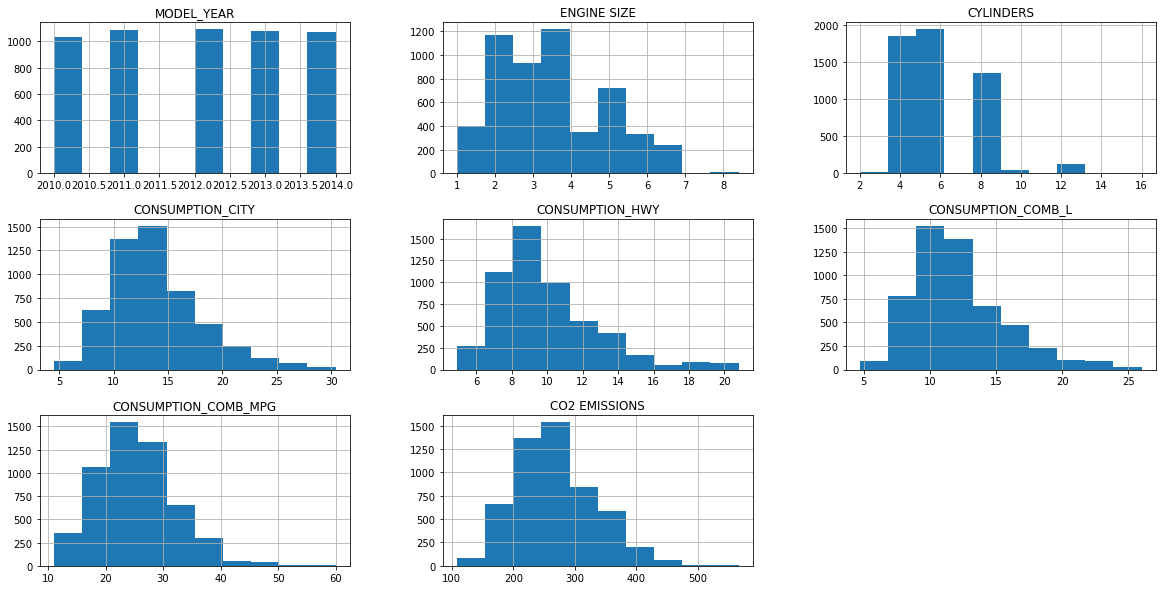

In [18]:
# plotting distribution graphs
df.hist(figsize=(20, 10))
plt.show()

From the distribution above, MODEL_YEAR and CYLINDERS appear to be discrete in nature.<br>The other features are continuous. With the exception of ENGINE SIZE and CO2 EMISSIONS, the continous features are right skewed. 

In [4]:
df['MODEL_YEAR'] = df['MODEL_YEAR'].astype(int)
df[['CYLINDERS', 'MODEL_YEAR']] = df[['CYLINDERS', 'MODEL_YEAR']].astype(str) # converting CYLINDERS to string since it is categorical in nature 

### Feature selection & Scaling for all Continuous Numerical Features

In order to build a regression model, feature selection is important. In this case, continuous numerical features.<br>Scaling is done with Standard Scaler due to the distribution graph seen above.

In [20]:
# code to extract numerical variables from the dataframe
num_df = df.select_dtypes(exclude = 'object')
num_df

,ENGINE SIZE,CONSUMPTION_CITY,CONSUMPTION_HWY,CONSUMPTION_COMB_L,CONSUMPTION_COMB_MPG,CO2 EMISSIONS
0,2.0,10.9,7.8,9.5,30.0,219.0
1,2.0,10.0,7.6,8.9,32.0,205.0
2,2.0,11.6,8.1,10.0,28.0,230.0
3,3.7,14.8,11.3,13.2,21.0,304.0
4,2.3,13.2,10.3,11.9,24.0,274.0
...,...,...,...,...,...,...
5354,3.0,13.4,9.8,11.8,24.0,271.0
5355,3.2,13.2,9.5,11.5,25.0,264.0
5356,3.0,13.4,9.8,11.8,24.0,271.0
5357,3.2,12.9,9.3,11.3,25.0,260.0


Detecting Outliers of numerical features
It is important to identify outliers in a data set, so as to take measures in dealing with them. In this task, the percentage of outliers will be computed first, which will ultimately decide if to ignore the outliers or root out the issue.

In [21]:
def outliers_iqr(arr):
    qt_1, qt_3 = np.percentile(arr, [25, 75])
    iqr = qt_3 - qt_1
    
    lower_bound = qt_1 - (iqr * 1.5)
    upper_bound = qt_3 + (iqr * 1.5)
    
    out_arr = np.where((arr > upper_bound) | (arr < lower_bound))
    
    result = [False if elem in out_arr[0] else True for elem in range(len(arr)) ].count(False)
    
    # returns true or false array
    return result

In [22]:
num_df_list = []
for col in num_df:
    outs = outliers_iqr(num_df[col])
    dict_ = {'Column': col, 'No of Outliers': outs, 'Percentage': round(((outs/len(num_df))*100), 2)}
    num_df_list.append(dict_)
    
outliers = pd.DataFrame(data=num_df_list)

In [23]:
outliers

,Column,No of Outliers,Percentage
0,ENGINE SIZE,9,0.17
1,CONSUMPTION_CITY,163,3.04
2,CONSUMPTION_HWY,212,3.96
3,CONSUMPTION_COMB_L,183,3.41
4,CONSUMPTION_COMB_MPG,84,1.57
5,CO2 EMISSIONS,67,1.25


The outliers are a small percentage compared to the dataset. Therefore, in this task, they will not be looked into

### Splitting & Scaling Features

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

The below function improves readability and reuseability. The function splits the datasets into three goups, training, validation and testing group. After which all the values are scaled.

In [25]:
def scale_features(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # splitting the data set
    X, y = X_test, y_test
    X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=42) # splitting the test set equally
    
    std_scaler = StandardScaler()
    
    X_train_std = std_scaler.fit_transform(X_train)
    X_val_std = std_scaler.transform(X_val) 
    X_test_std = std_scaler.transform(X_test) # to avoid data leakage
    
    X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns)
    X_val_std = pd.DataFrame(X_val_std, columns = X_val.columns) 
    X_test_std = pd.DataFrame(X_test_std, columns = X_test.columns) # Convert numpy array to dataframe.
    
    return X_train_std, X_val_std, X_test_std, y_train, y_val, y_test

Extracting the target variable from the numerical dataframe.

In [26]:
X = num_df.drop('CO2 EMISSIONS', axis = 1)
y = num_df['CO2 EMISSIONS']

In [27]:
X_train, X_val, X_test, y_train, y_val, y_test = scale_features(X, y)

### Machine Learning Algorithms
* Multiple Linear Regression
* Elastic Net Regression
* Support Vector Machine
* K-Nearest Neighbour
* Decision Tree
* Ridge

#### Training Datasets with various models
Followed by evaluating models based on several metrics as seen below

In [28]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
models = [LinearRegression(), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), Ridge()]

In [30]:
def eval_model_scores(algorithms, scoring, cv):
        
    algo_result = []

    for algorithm in algorithms:
            
        model = algorithm
        scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv)
        scores = np.append(scores, abs(scores.mean()))
        result = scores.tolist()
        
        headers = ['Algorithm'] + [f'score {i+1}' for i in range(len(result)-1)] + ['Abs Mean Score']
        rows = [algorithm] + [i for i in result]
        algo_dict = dict(zip(headers, rows))
        algo_result.append(algo_dict)
        
    return algo_result

In [31]:
result_df = pd.DataFrame.from_dict(eval_model_scores(models, 'neg_root_mean_squared_error', 5))
result_df = result_df.sort_values('Abs Mean Score', ascending=True).reset_index(drop=True) 
result_df 

,Algorithm,score 1,score 2,score 3,score 4,score 5,Abs Mean Score
0,DecisionTreeRegressor(),-10.405887,-8.648090,-12.009866,-6.775320,-8.385108,9.244854
1,KNeighborsRegressor(),-9.812161,-12.671196,-17.963863,-12.323385,-11.713980,12.896917
2,LinearRegression(),-23.439524,-24.017186,-24.253672,-24.532786,-23.096588,23.867951
3,Ridge(),-23.449593,-24.034048,-24.254828,-24.570073,-23.093865,23.880481
4,SVR(),-25.731662,-24.986089,-25.295792,-27.499282,-23.905527,25.483670
5,ElasticNet(),-25.150828,-26.060654,-25.526764,-26.073120,-25.223796,25.607032


#### Testing the models with validation set

In [32]:
def report_model_test(model):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    r_score = round(r2_score(y_val, y_pred), 2)
    mae = round(mean_absolute_error(y_val, y_pred), 2)
    mse = round(mean_squared_error(y_val, y_pred), 2)
    rmse = round(np.sqrt(mse), 2)
    
    eval_tup = (r_score, mae, mse, rmse)
    
    return eval_tup

In [33]:
def run_evaluation(models):
    algo_result = []

    for model in models:

        result = report_model_test(model)
        algo_dict = {'Algorithm': model, 'Coefficient of determination': result[0],
                     'Mean absolute error': result[1], 'Mean squared error': result[2], 
                     'Root mean squared error': result[3]
                     }

        algo_result.append(algo_dict)
        
    return algo_result
    


In [34]:
result_df = pd.DataFrame.from_dict(run_evaluation(models))
result_df = result_df.sort_values('Root mean squared error').reset_index(drop=True) 
result_df

,Algorithm,Coefficient of determination,Mean absolute error,Mean squared error,Root mean squared error
0,DecisionTreeRegressor(),0.99,0.82,46.17,6.79
1,KNeighborsRegressor(),0.97,3.31,142.60,11.94
2,LinearRegression(),0.87,14.69,520.74,22.82
3,Ridge(),0.87,14.66,523.80,22.89
4,ElasticNet(),0.85,17.19,613.80,24.77
5,SVR(),0.84,9.44,654.10,25.58


### Model Selection

Decision Tree Regressor performed best by the evaluation metric used.

### Using GridSearch 

Implementing GridSearch to obtain the best hyperparameters for maximum model performance

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
model = DecisionTreeRegressor()

In [37]:
params = {
          "max_depth": range(11, 15),
          "min_samples_leaf": [1, 2, 5],
          "min_samples_split": [2, 3, 5]
         }

In [38]:
grid = GridSearchCV(model, param_grid=params, cv=5, scoring='neg_root_mean_squared_error', verbose=1)

In [39]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(11, 15),
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 3, 5]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [40]:
grid.best_params_

{'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [41]:
grid.best_score_

-8.278635663692135

In [42]:
dt_model = DecisionTreeRegressor(**grid.best_params_)


In [43]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=13)

#### Evaluate Model

In [44]:
evaluate = []

In [45]:
y_train_pred = dt_model.predict(X_train)

In [46]:
rmse = round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 2)
evaluate.append(rmse)
print(f'Root Mean Squared Error (Training set): ', rmse)

Root Mean Squared Error (Training set):  0.62


In [47]:
y_val_pred = dt_model.predict(X_val)

In [48]:
rmse = round(np.sqrt(mean_squared_error(y_val, y_val_pred)), 2)
evaluate.append(rmse)
print(f'Root Mean Squared Error (Validation set): ', rmse)

Root Mean Squared Error (Validation set):  6.81


In [49]:
y_test_pred = dt_model.predict(X_test)

In [50]:
rmse = round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 2)
evaluate.append(rmse)
print(f'Root Mean Squared Error (Test set): ', rmse)

Root Mean Squared Error (Test set):  7.99


### Data Exploration
Correlation heatmap is used to detect collinearity among the datset. i.e. Non target variables that have direct correlation with one another. If found, they should be dropped because they are somewhat providing the same information.

<AxesSubplot:>

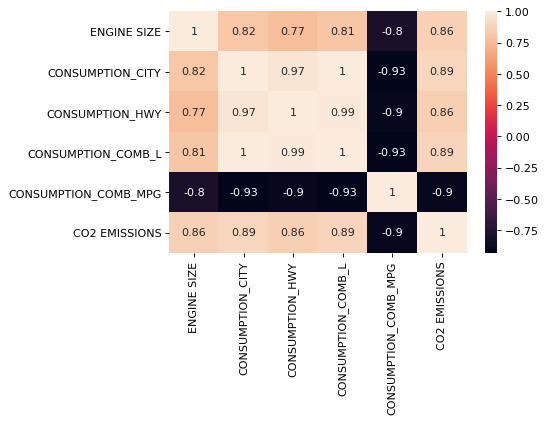

In [51]:
plt.figure(dpi=80)
sns.heatmap(num_df.corr(), annot = True)

In [52]:
# removing features with direct correlation to one another.

X = X.drop(['CONSUMPTION_HWY', 'CONSUMPTION_COMB_L'], axis = 1)
X_train, X_val, X_test, y_train, y_val, y_test = scale_features(X, y)

### Repeating Model Creation with Cross-Validation

#### Training the models with the new features

In [53]:
models = [LinearRegression(), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), Ridge()]

In [54]:
result_df = pd.DataFrame.from_dict(eval_model_scores(models, 'neg_root_mean_squared_error', 5))
result_df = result_df.sort_values('Abs Mean Score', ascending=True).reset_index(drop=True) 
result_df 

,Algorithm,score 1,score 2,score 3,score 4,score 5,Abs Mean Score
0,DecisionTreeRegressor(),-11.037170,-9.213452,-7.370993,-8.074093,-5.980008,8.335143
1,KNeighborsRegressor(),-11.726254,-12.718470,-18.492186,-11.423676,-10.775038,13.027125
2,Ridge(),-23.459059,-24.057048,-24.234641,-24.629177,-23.144457,23.904877
3,LinearRegression(),-23.459201,-24.056641,-24.235110,-24.629504,-23.144392,23.904969
4,SVR(),-25.420832,-24.638821,-25.571551,-27.604237,-23.886395,25.424367
5,ElasticNet(),-24.870887,-26.120026,-26.165540,-26.367379,-25.774885,25.859743


#### Testing the models

In [55]:
result_df = pd.DataFrame.from_dict(run_evaluation(models))
result_df = result_df.sort_values('Root mean squared error').reset_index(drop=True) 
result_df

,Algorithm,Coefficient of determination,Mean absolute error,Mean squared error,Root mean squared error
0,DecisionTreeRegressor(),0.98,2.72,89.84,9.48
1,KNeighborsRegressor(),0.97,4.31,134.83,11.61
2,LinearRegression(),0.87,14.72,521.80,22.84
3,Ridge(),0.87,14.72,521.78,22.84
4,ElasticNet(),0.84,17.63,639.31,25.28
5,SVR(),0.84,10.81,674.75,25.98


#### Using GridSearch for DecisionTreeRegression model

In [56]:
# choose the best model from the above.

model = DecisionTreeRegressor()
params = {
          "max_depth": range(10, 16),
          "min_samples_leaf": [1, 2, 5, 8],
          "min_samples_split": [5, 10, 12, 15]
         }

grid = GridSearchCV(model, param_grid=params, cv=5, scoring='neg_root_mean_squared_error', verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(10, 16),
                         'min_samples_leaf': [1, 2, 5, 8],
                         'min_samples_split': [5, 10, 12, 15]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [57]:
grid.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [58]:
grid.best_score_

-8.50816737860018

In [59]:
dt_model = DecisionTreeRegressor(**grid.best_params_)

In [60]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=5)

#### Evaluate Model

In [61]:
evaluate_feat = []

In [62]:
y_train_pred = dt_model.predict(X_train)

In [63]:
rmse = round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 2)
evaluate_feat.append(rmse)
print(f'Root Mean Squared Error (Training set): ', rmse)

Root Mean Squared Error (Training set):  5.35


In [64]:
y_val_pred = dt_model.predict(X_val)

In [65]:
rmse = round(np.sqrt(mean_squared_error(y_val, y_val_pred)), 2)
evaluate_feat.append(rmse)
print(f'Root Mean Squared Error (Validation set): ', rmse)

Root Mean Squared Error (Validation set):  10.75


In [66]:
y_test_pred = dt_model.predict(X_test)

In [67]:
rmse = round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 2)
evaluate_feat.append(rmse)
print(f'Root Mean Squared Error (Test set): ', rmse)

Root Mean Squared Error (Test set):  7.93


In [68]:
res = [evaluate, evaluate_feat]
res_df = pd.DataFrame(res, columns = ['train', 'validation', 'test'], index= ['all_features', 'selected_features'])
res_df

,train,validation,test
all_features,0.62,6.81,7.99
selected_features,5.35,10.75,7.93


# QUESTION 3

### CO2 Emission from 2010-2014

In [69]:
df.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,CONSUMPTION_CITY,CONSUMPTION_HWY,CONSUMPTION_COMB_L,CONSUMPTION_COMB_MPG,CO2 EMISSIONS
0,2010,ACURA,CSX,COMPACT,2.0,4.0,AS5,X,10.9,7.8,9.5,30.0,219.0
1,2010,ACURA,CSX,COMPACT,2.0,4.0,M5,X,10.0,7.6,8.9,32.0,205.0
2,2010,ACURA,CSX,COMPACT,2.0,4.0,M6,Z,11.6,8.1,10.0,28.0,230.0
3,2010,ACURA,MDX AWD,SUV,3.7,6.0,AS6,Z,14.8,11.3,13.2,21.0,304.0
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4.0,AS5,Z,13.2,10.3,11.9,24.0,274.0


<AxesSubplot:xlabel='MODEL_YEAR', ylabel='CO2 EMISSIONS'>

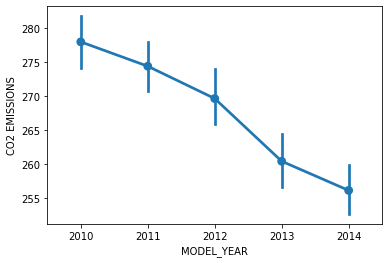

In [70]:
sns.pointplot(data=df, x='MODEL_YEAR', y='CO2 EMISSIONS')

The point plot above shows a decline in CO2 emission from 2010 to 2014

# QUESTION 4
## Building a Classification Model

### Feature selection & Scaling 

In [71]:
num_df = df.select_dtypes(exclude = 'object')

In [72]:
num_df.head()

,ENGINE SIZE,CONSUMPTION_CITY,CONSUMPTION_HWY,CONSUMPTION_COMB_L,CONSUMPTION_COMB_MPG,CO2 EMISSIONS
0,2.0,10.9,7.8,9.5,30.0,219.0
1,2.0,10.0,7.6,8.9,32.0,205.0
2,2.0,11.6,8.1,10.0,28.0,230.0
3,3.7,14.8,11.3,13.2,21.0,304.0
4,2.3,13.2,10.3,11.9,24.0,274.0


In [73]:
cat_df = df.select_dtypes(include = 'object')

In [74]:
cat_df.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE CLASS,CYLINDERS,TRANSMISSION,FUEL_TYPE
0,2010,ACURA,CSX,COMPACT,4.0,AS5,X
1,2010,ACURA,CSX,COMPACT,4.0,M5,X
2,2010,ACURA,CSX,COMPACT,4.0,M6,Z
3,2010,ACURA,MDX AWD,SUV,6.0,AS6,Z
4,2010,ACURA,RDX AWD TURBO,SUV,4.0,AS5,Z


In [75]:
for col in cat_df.columns:
    print('{}: {}'.format(col, len(df[col].unique())))

MODEL_YEAR: 5
MAKE: 45
MODEL: 1210
VEHICLE CLASS: 17
CYLINDERS: 9
TRANSMISSION: 22
FUEL_TYPE: 4


### Classifying MODEL_YEAR

In [76]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [77]:
def balance_dataset(X, y, n):
    sm = SMOTE(random_state=42, k_neighbors = n) # The object is created
    try:
        X, y = sm.fit_resample(X, y)
        out = X, y
    except ValueError:
        out = False
    
    return out

In [78]:
def scale_features(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # splitting the data set

    std_scaler = StandardScaler()
    
    X_train_std = std_scaler.fit_transform(X_train)
    X_test_std = std_scaler.transform(X_test) # to avoid data leakage
    
    X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns)
    X_test_std = pd.DataFrame(X_test_std, columns = X_test.columns) # Convert numpy array to dataframe.
    
    return X_train_std, X_test_std, y_train, y_test

In [79]:
def train_model(X_train, X_test, y_train, y_test):
    model = LogisticRegression(solver= 'saga' , max_iter=500, penalty='elasticnet', l1_ratio=0.4)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test,y_pred))   
    
    plt.figure(dpi=100) 
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.xticks(rotation=90)
    plt.show()

In [80]:
def classification(column, k):
    num_df = df.select_dtypes(exclude = 'object')    
    cat_df = df.select_dtypes(include = 'object')    
    
    cat_df = cat_df.drop(column, axis = 1)
    cat_df = pd.get_dummies(cat_df, drop_first=True)
    
    new_df = pd.concat([num_df, cat_df],axis=1)
    
    X = new_df
    y = df[column]
    
    bal = balance_dataset(X, y, k)
    if bal == False:
        print('Too many classes with only 1 instance\nRequire more data')
        
    else:
        X_train, X_test, y_train, y_test = scale_features(X, y)  

        train_model(X_train, X_test, y_train, y_test)

C:\Users\maegb\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

        2010       0.30      0.30      0.30       330
        2011       0.11      0.11      0.11       322
        2012       0.12      0.13      0.12       314
        2013       0.18      0.18      0.18       325
        2014       0.31      0.26      0.29       317

    accuracy                           0.20      1608
   macro avg       0.20      0.20      0.20      1608
weighted avg       0.20      0.20      0.20      1608



<Figure size 600x400 with 0 Axes>

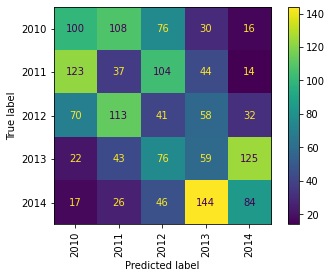

In [81]:
classification('MODEL_YEAR', 2)

In [82]:
classification('MAKE', 2)

Too many classes with only 1 instance
Require more data


In [83]:
classification('MODEL', 2)

Too many classes with only 1 instance
Require more data


C:\Users\maegb\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


                          precision    recall  f1-score   support

                 COMPACT       0.87      0.87      0.87       237
               FULL-SIZE       0.93      0.78      0.85       116
                MID-SIZE       0.86      0.92      0.89       228
             MINICOMPACT       0.94      0.94      0.94        82
                 MINIVAN       1.00      0.74      0.85        27
    PICKUP TRUCK - SMALL       1.00      1.00      1.00        56
 PICKUP TRUCK - STANDARD       0.99      0.98      0.99       122
 SPECIAL PURPOSE VEHICLE       1.00      1.00      1.00         2
STATION WAGON - MID-SIZE       1.00      0.50      0.67         4
   STATION WAGON - SMALL       0.97      0.90      0.93        62
              SUBCOMPACT       0.91      0.92      0.91       134
                     SUV       0.87      0.93      0.90       221
             SUV - SMALL       0.88      0.90      0.89        87
          SUV - STANDARD       0.68      0.76      0.72        66
         

<Figure size 600x400 with 0 Axes>

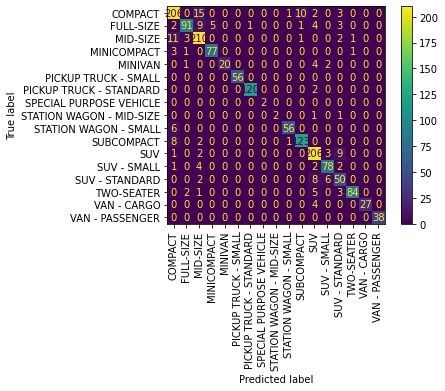

In [84]:
classification('VEHICLE CLASS', 2)

C:\Users\maegb\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

        10.0       0.62      0.50      0.56        20
        12.0       0.87      0.93      0.90        29
        16.0       1.00      1.00      1.00         2
         3.0       1.00      1.00      1.00         3
         4.0       0.96      0.99      0.97       569
         5.0       0.89      0.89      0.89        36
         6.0       0.95      0.94      0.95       529
         8.0       0.95      0.93      0.94       420

    accuracy                           0.95      1608
   macro avg       0.91      0.90      0.90      1608
weighted avg       0.95      0.95      0.95      1608



<Figure size 600x400 with 0 Axes>

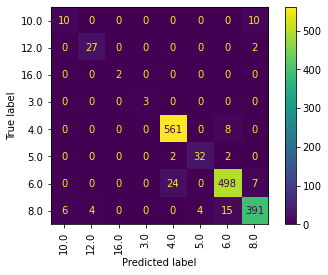

In [85]:
classification('CYLINDERS', 2)

C:\Users\maegb\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\maegb\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maegb\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maegb\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-scor

              precision    recall  f1-score   support

          A4       0.71      0.79      0.75       142
          A5       0.63      0.58      0.61        62
          A6       0.65      0.64      0.65       275
          A7       0.74      0.62      0.68        37
          A8       0.68      0.89      0.77        54
          A9       1.00      1.00      1.00         3
         AM5       1.00      0.50      0.67         2
         AM6       1.00      0.25      0.40         8
         AM7       0.41      0.38      0.39        34
         AS4       0.27      0.30      0.29        10
         AS5       0.51      0.38      0.44        47
         AS6       0.68      0.63      0.65       341
         AS7       0.71      0.67      0.69        91
         AS8       0.67      0.62      0.64        47
         AS9       0.00      0.00      0.00         0
          AV       0.71      0.61      0.66       101
         AV6       0.29      0.50      0.36         4
         AV7       0.00    

<Figure size 600x400 with 0 Axes>

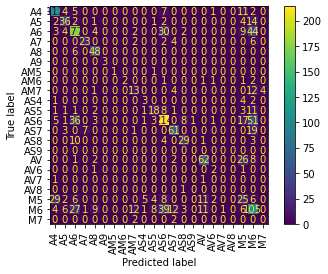

In [86]:
classification('TRANSMISSION', 1)

              precision    recall  f1-score   support

           D       1.00      0.70      0.83        27
           E       0.99      0.99      0.99       134
           X       0.95      0.99      0.97       799
           Z       0.98      0.94      0.96       648

    accuracy                           0.96      1608
   macro avg       0.98      0.90      0.94      1608
weighted avg       0.97      0.96      0.96      1608



C:\Users\maegb\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Figure size 600x400 with 0 Axes>

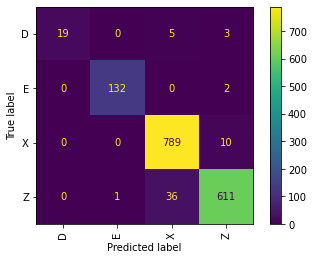

In [87]:
classification('FUEL_TYPE', 2)

## QUESTION 8

In [88]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

### K-Means Clustering

In [89]:
X = df.select_dtypes(exclude = 'object')

In [90]:
std_scaler = MinMaxScaler()
X_std = std_scaler.fit_transform(X)

In [91]:
X_df = pd.DataFrame(X_std, columns = X.columns)

In [92]:
ssd = [] 
sil_idx = []
calinski_idx = []
davies_idx = []

index = range(2, 20)
for i in index:
    model = KMeans(n_clusters=i, random_state=42)
    cluster_labels = model.fit_predict(X_std)
    ssd.append(round(model.inertia_, 2))
    
    sil_idx.append(round(silhouette_score(X_std, cluster_labels), 2))
    calinski_idx.append(round(calinski_harabasz_score(X_std, cluster_labels), 2))
    davies_idx.append(round(davies_bouldin_score(X_std, cluster_labels), 2))
    
    dict_ = {'k value': index, 'Sum of Squared Distance': ssd, 'Silhouette Coefficient': sil_idx,
             'Calinski-Harabasz Index': calinski_idx, 'Davies-Bouldin Index': davies_idx}

# ssd should be reduced
# Sil_idx should be close to +1
# Cal_idx should be high
# dav_idx should be small

In [93]:
result_df = pd.DataFrame.from_dict(dict_)
result_df['SSD Difference'] = result_df['Sum of Squared Distance'].diff()
result_df

,k value,Sum of Squared Distance,Silhouette Coefficient,Calinski-Harabasz Index,Davies-Bouldin Index,SSD Difference
0,2,339.59,0.53,8131.49,0.70,NaN
1,3,205.19,0.46,8481.60,0.72,-134.40
2,4,150.92,0.42,8328.57,0.83,-54.27
3,5,121.56,0.41,8076.85,0.80,-29.36
4,6,98.31,0.40,8241.31,0.83,-23.25
5,7,84.81,0.41,8101.16,0.86,-13.50
6,8,76.70,0.37,7757.50,0.91,-8.11
7,9,70.48,0.35,7444.98,0.93,-6.22
8,10,63.68,0.38,7385.54,0.87,-6.80
9,11,58.05,0.38,7342.49,0.86,-5.63


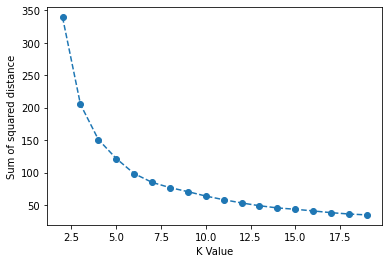

In [94]:
plt.plot(index, ssd, 'o--')
plt.xlabel('K Value')
plt.ylabel('Sum of squared distance')
plt.show()

Using the elbow method to determine the optimum number n_clusters

### Building the model

In [95]:
model = KMeans(n_clusters=7, random_state=42)

In [96]:
cluster_labels = model.fit_predict(X_std)

In [97]:
X_df['Cluster'] = cluster_labels

In [98]:
X_df.corr()['Cluster'].sort_values()

CO2 EMISSIONS          -0.125003
CONSUMPTION_CITY       -0.013970
CONSUMPTION_COMB_L     -0.006488
CONSUMPTION_HWY         0.006569
ENGINE SIZE             0.051803
CONSUMPTION_COMB_MPG    0.097125
Cluster                 1.000000
Name: Cluster, dtype: float64

<AxesSubplot:>

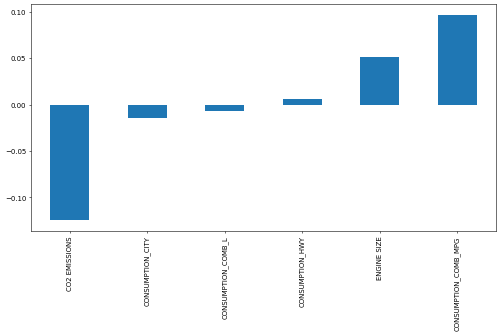

In [99]:
plt.figure(figsize=(12,6),dpi=50)
X_df.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

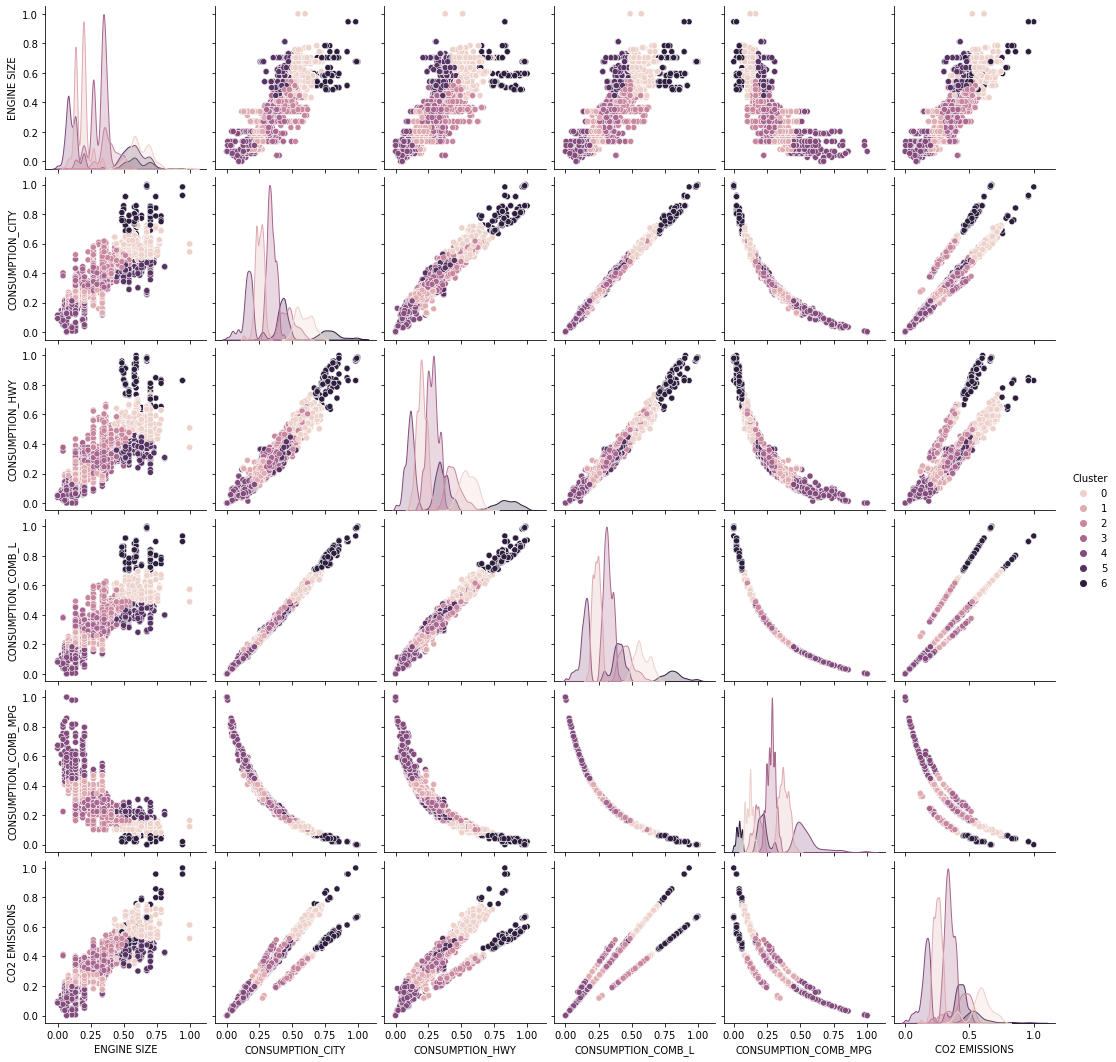

In [100]:
sns.pairplot(data=X_df, hue='Cluster')

In [101]:
sil_idx = round(silhouette_score(X_std, cluster_labels), 2)
calinski_idx = round(calinski_harabasz_score(X_std, cluster_labels), 2)
davies_idx = round(davies_bouldin_score(X_std, cluster_labels), 2)

print(f'Silhouette Coefficient: {sil_idx}\nCalinski-Harabasz Index: {calinski_idx}\nDavies-Bouldin Index: {davies_idx}')

Silhouette Coefficient: 0.41
Calinski-Harabasz Index: 8101.16
Davies-Bouldin Index: 0.86


From the pair plot above, it can be observed that the k means classification output shares some similarities with CYLINDERS

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


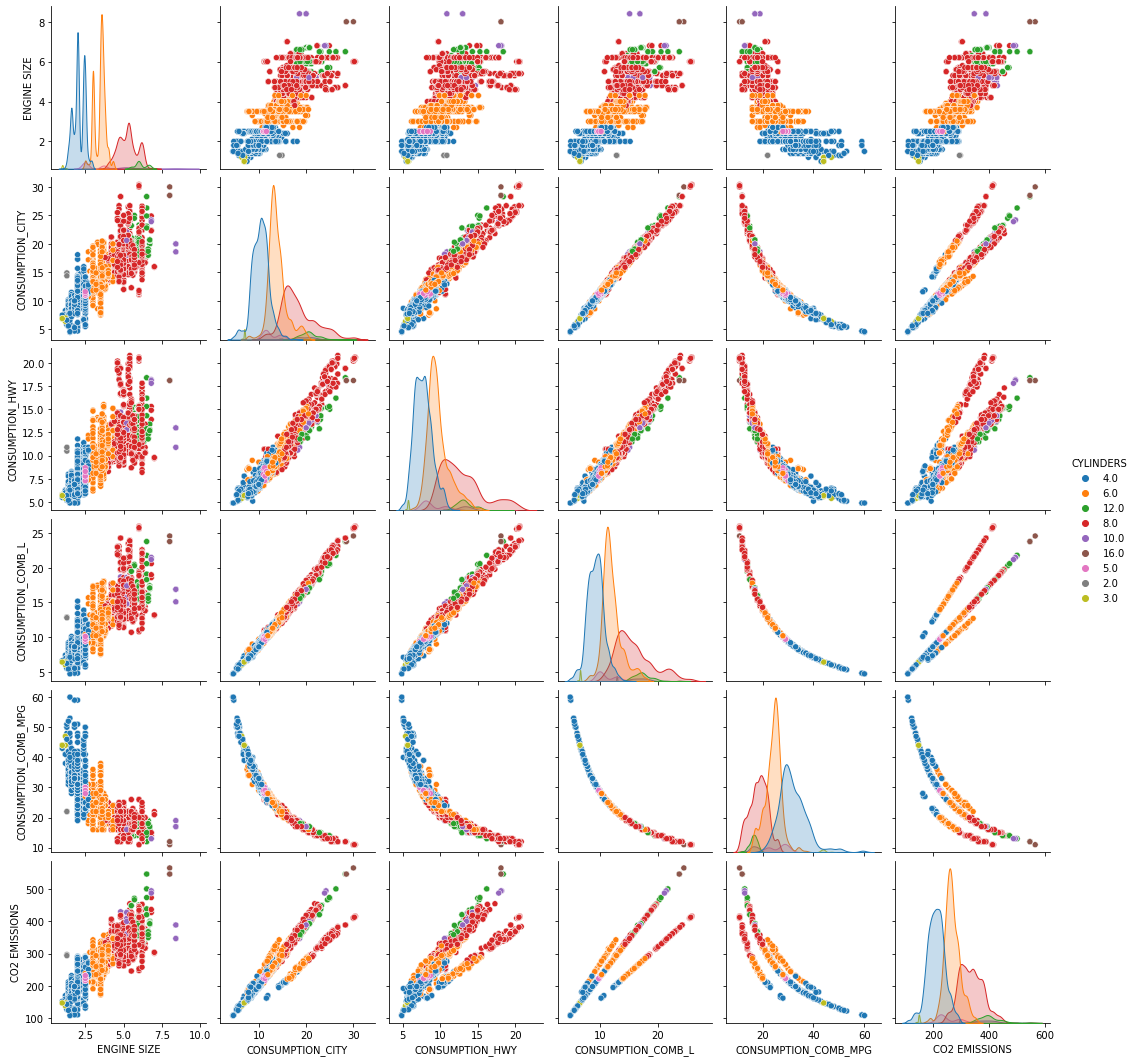

In [5]:
sns.pairplot(data=df, hue='CYLINDERS')